CNN Model for Finding Waldo 

In [1]:
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np
import pandas as pd

Using TensorFlow backend.


Testing pulling image from folder

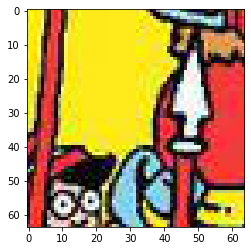

In [2]:
# make the print inline
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

x = mpimg.imread("C:/Users/Jacky Gnong/Desktop/Hey-Waldo/64/waldo/1_4_6.jpg")
plt.imshow(x, cmap=plt.cm.gray)

csv file to organize the images

In [3]:
# 'answer key' for where the waldos are
# Organized as - original_image_row_column.jpg

imgs = pd.read_csv("C:/Users/Jacky Gnong/Desktop/Hey-Waldo/waldo.csv")
imgs.head()
# imgs['waldo_64_color'].dropna()

,waldo_64_color,waldo_64_bw,waldo_64_gray,notwaldo_64_color,notwaldo_64_bw,notwaldo_64_gray,waldo_128_color,waldo_128_bw,waldo_128_gray,notwaldo_128_color,notwaldo_128_bw,notwaldo_128_gray,waldo_256_color,waldo_256_bw,waldo_256_gray,notwaldo_256_color,notwaldo_256_bw,notwaldo_256_gray
0,1_4_6.jpg,1_4_6.jpg,1_4_6.jpg,1_0_0.jpg,1_0_0.jpg,1_0_0.jpg,1_2_3.jpg,1_2_3.jpg,1_2_3.jpg,1_0_0.jpg,1_0_0.jpg,1_0_0.jpg,1_1_1.jpg,1_1_1.jpg,1_1_1.jpg,1_0_0.jpg,1_0_0.jpg,1_0_0.jpg
1,1_4_7.jpg,1_4_7.jpg,1_4_7.jpg,1_0_1.jpg,1_0_1.jpg,1_0_1.jpg,2_1_2.jpg,2_1_2.jpg,2_1_2.jpg,1_0_1.jpg,1_0_1.jpg,1_0_1.jpg,2_0_1.jpg,2_0_1.jpg,2_0_1.jpg,1_0_1.jpg,1_0_1.jpg,1_0_1.jpg
2,2_2_5.jpg,2_2_5.jpg,2_2_5.jpg,1_0_10.jpg,1_0_10.jpg,1_0_10.jpg,2_3_1.jpg,2_3_1.jpg,2_3_1.jpg,1_0_2.jpg,1_0_2.jpg,1_0_2.jpg,2_1_0.jpg,2_1_0.jpg,2_1_0.jpg,1_0_2.jpg,1_0_2.jpg,1_0_2.jpg
3,2_7_3.jpg,2_7_3.jpg,2_7_3.jpg,1_0_11.jpg,1_0_11.jpg,1_0_11.jpg,3_7_0.jpg,3_7_0.jpg,3_7_0.jpg,1_0_3.jpg,1_0_3.jpg,1_0_3.jpg,21_0_0.jpg,3_3_0.jpg,3_3_0.jpg,1_0_3.jpg,1_0_3.jpg,1_0_3.jpg
4,3_15_1.jpg,3_15_1.jpg,3_15_1.jpg,1_0_12.jpg,1_0_12.jpg,1_0_12.jpg,4_1_5.jpg,4_1_5.jpg,4_1_5.jpg,1_0_4.jpg,1_0_4.jpg,1_0_4.jpg,3_3_0.jpg,4_0_2.jpg,4_0_2.jpg,1_1_0.jpg,1_1_0.jpg,1_1_0.jpg


creating x and y feature table

In [4]:
# iterate thru all the picture

x = [] # images
y = [] # whether waldo or not waldo

total = len(imgs['waldo_64_color'].dropna()) + len(imgs['notwaldo_64_color'].dropna())

pixel_to_pic = [[0 for i in range(4096)] for j in range(total)]

# iterate thru all the picture
for item in range(len(imgs['waldo_64_color'].dropna())):
    
    image = mpimg.imread("C:/Users/Jacky Gnong/Desktop/Hey-Waldo/64/waldo/" + imgs['waldo_64_color'][item])
    image = image.ravel()
    y.append(1)

    # interate thru all the pixel of 64x64 picture
    for pixel in range(4096):
        pixel_to_pic[item][pixel] = image[pixel]
        
    # print(pixel_to_pic)

    col = [""] * 4096
    for k in range(4096):
        col[k] = str(k)

    
for item in range(len(imgs['notwaldo_64_color'].dropna())):
    
    image = mpimg.imread("C:/Users/Jacky Gnong/Desktop/Hey-Waldo/64/notwaldo/" + imgs['notwaldo_64_color'][item])
    image = image.ravel()
    y.append(0)
    
    # interate thru all the pixel of 64x64 picture
    for pixel in range(4096):
        pixel_to_pic[item][pixel] = image[pixel]
        
    # print(pixel_to_pic)

    col = [""] * 4096
    for k in range(4096):
        col[k] = str(k)

x = pd.DataFrame(pixel_to_pic, columns=col)
y = pd.DataFrame({'is_waldo': y})
x.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,250,76,65,224,56,81,172,34,96,62,...,32,11,8,78,11,18,91,0,0,96
1,162,71,70,160,47,49,122,0,0,211,...,184,141,124,198,139,123,209,138,132,196
2,56,34,20,19,0,0,22,1,16,31,...,73,64,85,0,0,7,22,28,26,16
3,225,255,19,233,237,38,255,228,48,255,...,242,236,20,243,236,0,252,239,13,255
4,238,228,69,255,236,48,253,235,11,241,...,25,17,40,3,0,0,117,111,61,247


Normalizing Data

In [5]:
from sklearn import preprocessing

preprocessing.scale(x)

array([[ 1.17867056, -0.96658708, -0.80163235, ..., -1.95972358,
        -1.66444505, -0.89249637],
       [-0.00730001, -1.03244948, -0.73650174, ..., -0.12796586,
         0.0995957 ,  0.47975423],
       [-1.43585546, -1.51983124, -1.38780788, ..., -1.58806259,
        -1.31698248, -1.99029685],
       ...,
       [-2.190564  , -1.96769556, -1.64833034, ..., -1.95972358,
        -1.66444505, -2.20985694],
       [-2.190564  , -1.96769556, -1.64833034, ..., -1.95972358,
        -1.66444505, -2.20985694],
       [-2.190564  , -1.96769556, -1.64833034, ..., -1.95972358,
        -1.66444505, -2.20985694]])

Training and Testing data split

In [6]:
from sklearn.model_selection import train_test_split

# Randomly splitting the original dataset into training set and testing set:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)
print(x_train.shape)
print(x_test.shape)

(4300, 4096)
(1076, 4096)


reduce dimension with PCA to process faster

In [7]:
from sklearn.decomposition import PCA
k = 50 # k is the number of components (new features) after dimensionality reduction
my_pca = PCA(n_components = k)
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction:
x_train_new = my_pca.fit_transform(x_train)
x_test_new = my_pca.transform(x_test)


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                          learning_rate_init = 0.1,
                                          verbose=False, tol=0.0001)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

x_normalized_pca = my_pca.fit_transform(preprocessing.normalize(x_train))

# fit the grid (start the grid search):
grid.fit(x_normalized_pca, y_train.values.ravel())

# # view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 



C:\Users\Jacky Gnong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  FitFailedWarning)
C:\Users\Jacky Gnong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  FitFailedWarning)
C:\Users\Jacky Gnong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  FitFailedWarning)
C:\Users\Jacky Gnong\anaconda3\lib\site-packages\sklearn\model_selection\_validati

0.9925581395348837
{'hidden_layer_sizes': 1}


In [ ]:
# Helper function to get spliced image
def splice_image(splice_size, img):    
    spliced_squares = []
    def get_square(x, y, img):
        square = [[0 for i in range(64)] for j in range(64)]
        for row in range(64):
            for col in range(64):
                if (row+y < len(img) and col+x < len(img[row])):
                    square[row][col] = original_images[0][row+y][col+x]
        spliced_squares.append(square)

    for i in range(math.ceil(len(img)/splice_size)):
        for j in range(math.ceil(len(img[i])/splice_size)):
            get_square(j*splice_size, i*splice_size, img)
            
splice_image(64, original_images[0])